#  IDEA LAB 6th Weekly Seminar Conference Code File
## Kennel & phi
<h3> Writer: Su-Yeon Kang </h3>
2022.08.09

## 파이 phi 예제

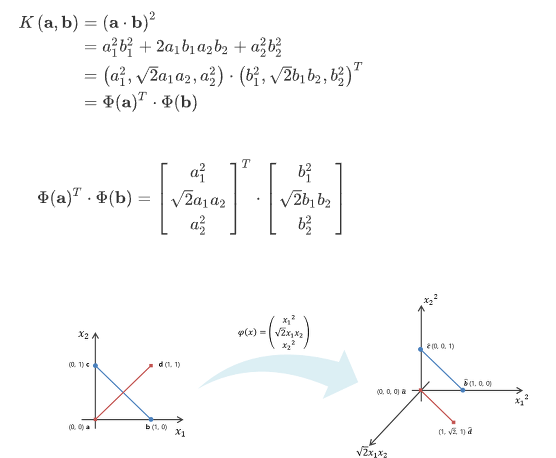

### 2차 다항식 매핑함수 

In [100]:
def phi(x1,x2): # 2차원데이터를 입력 받아 3차원으로 변환
    X1 = x1**2
    X2 = (2**0.5)*x1*x2
    X3 = x2**2
    return X1,X2,X3
phi(2,3)

(4, 8.485281374238571, 9)

In [101]:
import numpy as np
import matplotlib.pyplot as plt

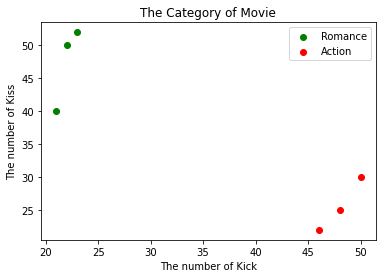

In [102]:
D2_dataset = np.array([
    [23, 52],
    [22, 50],
    [21, 40],
    [50, 30],
    [48, 25],
    [46, 22]
])
plt.title("The Category of Movie")
plt.scatter(D2_dataset[:3,0],D2_dataset[:3,1],label='Romance',
                c='g')
plt.scatter(D2_dataset[3:,0],D2_dataset[3:,1],label='Action',
                c='r')
    
plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

In [103]:
l= len(dataset)
D3_dataset = [] # 파이 함수를 거친 데이터를 저장할 배열 생성

for i in range(l):
    x1,x2 = D2_dataset[i][0],D2_dataset[i][1]
    X1,X2,X3 = phi(x1,x2)
    tmp = [X1,X2,X3]
    D3_dataset.append(tmp)
D3_dataset = np.array(D3_dataset)
D3_dataset

array([[ 529.        , 1691.3994206 , 2704.        ],
       [ 484.        , 1555.63491861, 2500.        ],
       [ 441.        , 1187.93939239, 1600.        ],
       [2500.        , 2121.32034356,  900.        ],
       [2304.        , 1697.05627485,  625.        ],
       [2116.        , 1431.18412512,  484.        ]])

In [104]:
# phi 함수를 사용하지 않고 매핑하기
for i in range(l):
    x1,x2 = D2_dataset[i][0],D2_dataset[i][1]

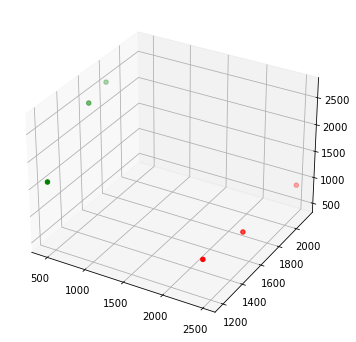

In [105]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

x = D3_dataset[:3,0]
y = D3_dataset[:3,1]
z = D3_dataset[:3,2]

ax.scatter(D3_dataset[:3,0],D3_dataset[:3,1], D3_dataset[:3,2], color = 'g', label='Romance')
ax.scatter(D3_dataset[3:,0],D3_dataset[3:,1], D3_dataset[3:,2], color = 'r', label='Action')

plt.show()

## 커널 트릭 예제
### 커널이란
커널 함수는 두개의 벡터(데이터)를 입력으로 가지며 K(a,b)형태로 나타낸다.

커널함수는 다음 성질을 만족해야한다.

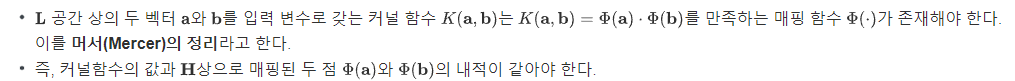


### 커널의 종류
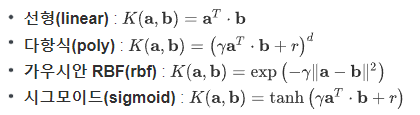
r = 감마, 하이퍼파라미터
gamma는 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 거다. 학습 데이터에 얼마나 민감하게 반응할 것인지 모델을 조정하는 거니까 C와 비슷한 개념이라 봐도 된다.



In [106]:
# 선형 커널 예시
a = np.array([1,10])
b = np.array([5, 2])

def linear_k(a,b):
    a = a.T
    return (np.dot(a,b)) ** 2

In [107]:
linear_k(a,b)

625

In [108]:
p_a = np.array(phi(a[0],a[1]))
p_b = np.array(phi(b[0],b[1]))
np.dot(p_a.T,p_b)

625.0

위 계산을 통해 머서 정리를 만족하는 것을 알 수 있다.

In [109]:
def poly_k(a,b,r):
    d = 2 # 데이터의 차원
    a = a.T
    return (r*(np.dot(a,b))) ** d
poly_k(a,b,2)

2500

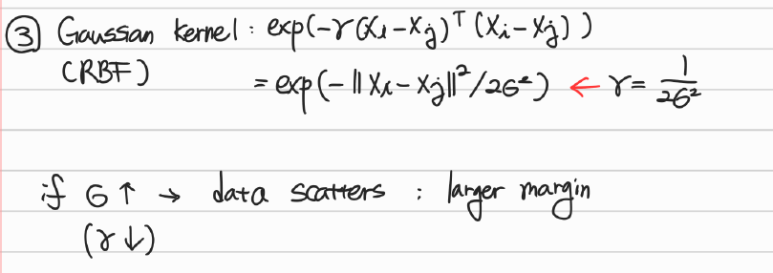
사진 출처: https://blog.naver.com/PostView.naver?blogId=chunsa0127&logNo=222198868593&parentCategoryNo=&categoryNo=14&viewDate=&isShowPopularPosts=false&from=postView

In [110]:
def RBF_k(a,b,r):
    dist = np.sqrt(np.sum(np.square(a-b)))
    return np.exp((-1)*r*((dist)**2))
RBF_k(a,b,2)

3.2574885322074285e-70

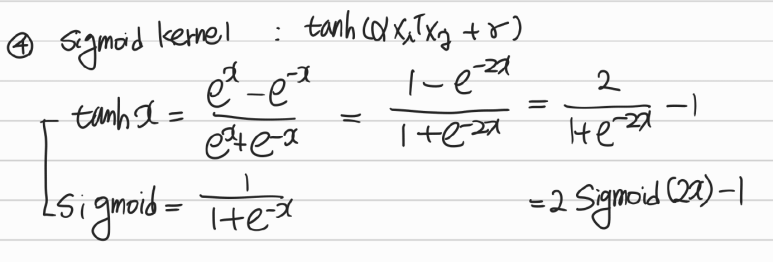
사진 출처: https://blog.naver.com/PostView.naver?blogId=chunsa0127&logNo=222198868593&parentCategoryNo=&categoryNo=14&viewDate=&isShowPopularPosts=false&from=postView

 tanh함수는 (1,-1)로 정의된다. tanh함수와 sigmoid함수는 딥러닝에서 활성화함수로도 많이 사용되는데, sigmoid함수는 미분값의 최대가 1/4, tanh함수는 1이라 층이 매우 깊게 쌓일 경우, 역전파 과정에서 gradient vanishing 문제가 발생할 수 있다.


In [99]:
def sig_k(a,b,r):
    delta = r * np.dot(a.T,b) + r
    return np.tan(delta)
sig_k(a,b,2)

-6.053272382792838

### 결론
1. non-linear한 data는 차원을 높이면 hyperplane에 의해 linear하게 구분될 수 있다.

2. 차원을 높이기 위해선 polynomial term 등 새로운 feature를 추가해야 한다.

3. 높은 차원의 데이터를 내적하여 최대화하는 과정이 SVM의 목적함수이다.

4. 차원을 높이는 것에는 선택지가 너무 많으며, 이를 직접 내적하는 것은 computaionally expensive하다.

5. 차원을 높여 내적한 값과 같은 결과를 주는 kernel함수를 활용하면, 차원을 높이는 mapping을 하지 않고 낮은 차원의 내적을 통해 같은 결과를 가져올 수 있다. mapping과 inner product를 한번에 해결!! (kernel trick)

6. kernel의 조건은 대칭성과 PSD이다. (inner product space의 공리와 연결)

7. 이를 만족하는 kernel은 여러 종류가 있으며, 각 kernel의 특징에 따라 hyperparameter가 상이하다.
